## Python imports and constants

In [ ]:

# Basic imports

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import qcodes as qc
import scipy.optimize as opt
import math



# Set matplotlib plots in intercative mode

%matplotlib notebook



# Import QCoDeS specific packages

from qcodes.dataset.data_set import load_by_id
from qcodes.dataset.plotting import plot_by_id
from qcodes.dataset.data_export import get_data_by_id



# Constants

Go = 7.7480917310e-5    # Conductance Quantum
eo = 8.85 * 1e-12       # Dielectric perimitivity
ersio = 3.9             # Dielectric constant of SiO
erhfo = 25              # Dielectric constant of HfO
t = 200 #thickness layer



# List of colours for plotting  

color_palette = ['y','m','c','lime','grey']

In [ ]:

# Create a database 


database = qc.initialise_or_create_database_at(qc.config.core.db_location)



# Load the database file
# Change the path according to your desired location

qc.config['core']['db_location'] = "/Users/qdev/OneDrive/Documents/KU/PhD/Scripts/PPMS/Data/Qdev999InSbPbAlchip1.db"

## Create your datasets from the measurement database

In [4]:

# If you chose to measure sweep up and sweep down follow the flow as it is,
# otherwise move further 


# Experiment ID number (exn) [XXX]: It's represented in the database as "results_XXX_1"

exn_up = 23
exn_down = exn_up + 1 

# Run ID number (idn) [YYY]: is often different than the experniment ID causing confusion
# To load and plot data we use "runID"
# You can find the comparison of experiment ID and run ID under the following path:
# DBbrowserSQLlite > Browse data > runs
idn_up = 13
idn_down = idn_up + 1




# Load the dataset-id for sweep up and down

data_fw = get_data_by_id(idn_up)
data_bw = get_data_by_id(idn_down)





# Here you need to check that the data[x][x] corresponds to the relevant quantity


# Sweep Forward 
# Gate Voltage in V
print('Gate voltage')
print(data_fw[0][0]['name'])
#print(data_fw[0][0]['data'])
Vg_fw = data_fw[0][0]['data']
# SD Current in A
print('Current')
print(data_fw[0][1]['name'])
#print(data_fw[0][1]['data'])
I_fw = data_fw[0][1]['data']
# SD Voltage in V
print('Voltage')
print(data_fw[2][1]['name'])
#print(data_fw[2][1]['data'])
Vsd_fw = data_fw[2][1]['data']
# Conductance in S and 2e2/h 
print('Conductance')
Gsi_fw = I_fw / Vsd_fw
Geh_fw = I_fw / Vsd_fw / Go

# Sweep Backwards
# Gate Voltage in V
print('Gate voltage')
print(data_bw[0][0]['name'])
#print(data_bw[0][0]['data'])
Vg_bw = data_bw[0][0]['data']
# SD Current in A
print('Current')
print(data_bw[0][1]['name'])
#print(data_bw[0][1]['data'])
I_bw = data_bw[0][1]['data']
# SD Voltage in V
print('Voltage')
print(data_bw[2][1]['name'])
#print(data_bw[2][1]['data'])
Vsd_bw = data_bw[2][1]['data']
# Conductance in S and 2e2/h 
print('Conductance')
Gsi_bw = I_bw / Vsd_bw
Geh_bw = I_bw / Vsd_bw / Go



# Sort ascending by voltage 
# Sweep Forward 
idx = np.argsort(Vg_fw)
Vg_fw = np.array(Vg_fw)[idx]
Vsd_fw = np.array(Vsd_fw)[idx]
I_fw = np.array(I_fw)[idx]
Geh_fw = np.array(Geh_fw)[idx]
Gsi_fw = np.array(Gsi_fw)[idx]
# Sweep Backwards
idx = np.argsort(Vg_bw)
Vg_bw = np.array(Vg_bw)[idx]
Vsd_bw = np.array(Vsd_bw)[idx]
I_bw = np.array(I_bw)[idx]
Geh_bw = np.array(Geh_bw)[idx]
Gsi_bw = np.array(Gsi_bw)[idx]

# Create the Dictionary
log = {}

Gate voltage
KL_smub_volt
Current
KL_smua_curr
Voltage
KL_smua_volt
Conductance
Gate voltage
KL_smub_volt
Current
KL_smua_curr
Voltage
KL_smua_volt
Conductance


## Import parameters in the dictionary

In [55]:
log['id']    = 'qdev'         # sapmple id, eg. qdev878_chip5_dev6_2probe

log['length']      = 100      # junction or segment lenght in nm
log['width']       = 100      # junction or segment width  in nm
t = 200                       # dielectric thickness layer in nm

# Capacitance calculation related to the three numbers given above
# Source: Gate capacitance of back-gated nanowire field-effect transistors
# Olaf Wunnicke; Appl. Phys. Lett. 89, 083102 (2006); https://doi.org/10.1063/1.2337853

log['capacitance'] = 2*np.pi*eo*ersio*log['length']*1e-9/(math.log((t+log['width']+np.sqrt((t+log['width'])**2-log['width']**2))/log['width']))


# Other relevant information for the device operation



# Instrumens

log['location']    = 'mqml' 
log['fridge']      = 'dynacoolppms'
log['lockin']      = '' # srs830
log['sourcemeter'] = 'keithley2614bsmub' #keithley2614bsmuasmub
log['multimeter']  = '' #keysight34465A
log['currentampl'] = '' # physicsbaselsp983withlsk389a
log['voltageampl'] = ''



# Dividers and amplification size

log['voltdivac'] = 1/1
log['voltdivdc'] = 1/1
log['gain']      = 1


# Lock-in parameters

log['timeconstant'] = 0 * 1e-3  # [1e-3s]=[ms] 
log['sensitivity']  = 0 * 1e-3  # [1e-3V]=[mV] 
log['frequency']    = 0         # Hz
log['amplitude']    = 0         # V  
log['filter_slope'] = 0         # dB/oct


# Loading conditions

log['loadingdate']      = '20190212'
log['operator']         = 'ajuan'
log['degastime']        = 12
log['degastempereture'] = 300



# Measurement conditions

log['temperature'] = 1.7 # K
log['field']       = 9 # T
log['biasvoltage'] = 5 * 1e-3 # [1e-3V]=[mV]
log['gatemax']     = int(max(Vg_bw))
log['gatemin']     = int(min(Vg_bw))
log['points']      = len(Vg_bw)
log['steps']       = float((log['gatemax']-log['gatemin'])/log['points'])
log['duration']    = 40
log['sweeprate']   = (log['gatemax']-log['gatemin'])/log['duration']
log['sweep']       = 'fwbw'


## Pick up points from plot

<IPython.core.display.Javascript object>


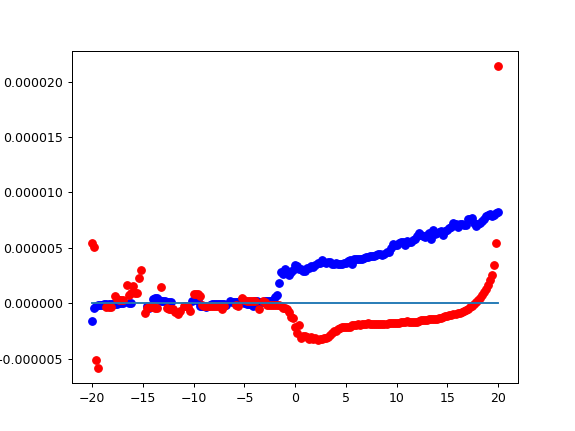

In [56]:
# Here what you need to do is to pick some points from the plots both for sweep up and down:
# We are interested for:
#
#     Pinch-off point 
#     Saturation of conductance
#     Tail close to the pinch-off
#


%matplotlib notebook

coordlist=[]

def onpick(event):
    thisline = event.artist
    xdata = thisline.get_xdata()
    ydata = thisline.get_ydata()
    ind = event.ind
    points = tuple(zip(xdata[ind], ydata[ind],ind))
    coordlist.append(points)

fig11 = plt.figure()
ax11  = fig11.add_subplot(111)

ax11.plot(Vg_fw, Geh_fw,'bo',picker=2)
ax11.plot(Vg_bw, Geh_bw,'ro',picker=2)
ax11.plot(np.linspace(min(Vg_fw),max(Vg_fw),len(Vg_fw)),np.zeros(len(Vg_fw)))
fig11.canvas.mpl_connect('pick_event', onpick)
plt.show()

In [40]:
# Print the list with the points that you have clicked

coordlist

[((-2.69985, 0.0037840143396602874, 23),),
 ((-2.69985, 0.0037840143396602874, 23),),
 ((-2.69985, 0.0037840143396602874, 23),),
 ((-2.69985, 0.0037840143396602874, 23),),
 ((-2.69985, 0.0037840143396602874, 23),),
 ((-2.69985, 0.0037840143396602874, 23),),
 ((1.69995, 0.010605323665904332, 67),),
 ((1.69995, 0.010605323665904332, 67),),
 ((1.69995, 0.010605323665904332, 67),),
 ((1.69995, 0.010605323665904332, 67),),
 ((1.69995, 0.010605323665904332, 67),),
 ((1.69995, 0.010605323665904332, 67),),
 ((1.69995, 0.010605323665904332, 67),),
 ((-1.00003, 0.06325192205980097, 40),),
 ((-1.00003, 0.06325192205980097, 40),),
 ((-1.00003, 0.06325192205980097, 40),),
 ((-1.00003, 0.06325192205980097, 40),),
 ((-1.00003, 0.06325192205980097, 40),),
 ((2.8996, 0.05244936927708812, 79),),
 ((2.8996, 0.05244936927708812, 79),),
 ((2.8996, 0.05244936927708812, 79),),
 ((2.8996, 0.05244936927708812, 79),),
 ((2.8996, 0.05244936927708812, 79),),
 ((2.8996, 0.05244936927708812, 79),),
 ((2.8996, 0.052

In [41]:
# Address the index of each point to the relevant variable

th_indx_fw    = 23
tail_indx_fw  = 40
satur_indx_fw = 250

th_indx_bw    = 67
tail_indx_bw  = 79
satur_indx_bw = 250

log['vth_fw']    = Vg_fw[th_indx_fw]
log['vth_bw']    = Vg_fw[th_indx_bw]
log['is_fw']     = I_fw[satur_indx_fw]
log['is_bw']     = I_bw[satur_indx_bw]
log['vs_fw']     = Vg_fw[satur_indx_fw]
log['vs_bw']     = Vg_fw[satur_indx_bw]
log['vtail_fw']  = Vg_fw[tail_indx_fw]
log['vtail_bw']  = Vg_fw[tail_indx_bw]
log['gtail_fw']  = Gsi_fw[tail_indx_fw]
log['gtail_bw']  = Gsi_fw[tail_indx_bw]
log['vonoff_fw'] = Vg_fw[satur_indx_fw]-Vg_fw[th_indx_fw]
log['vonoff_bw'] = Vg_fw[satur_indx_bw]-Vg_fw[th_indx_bw]
log['tail_range_fw'] = abs(Vg_fw[tail_indx_fw]-Vg_fw[th_indx_fw])
log['tail_range_bw'] = abs(Vg_fw[tail_indx_bw]-Vg_fw[th_indx_bw])

## Transconductance calculation

<IPython.core.display.Javascript object>


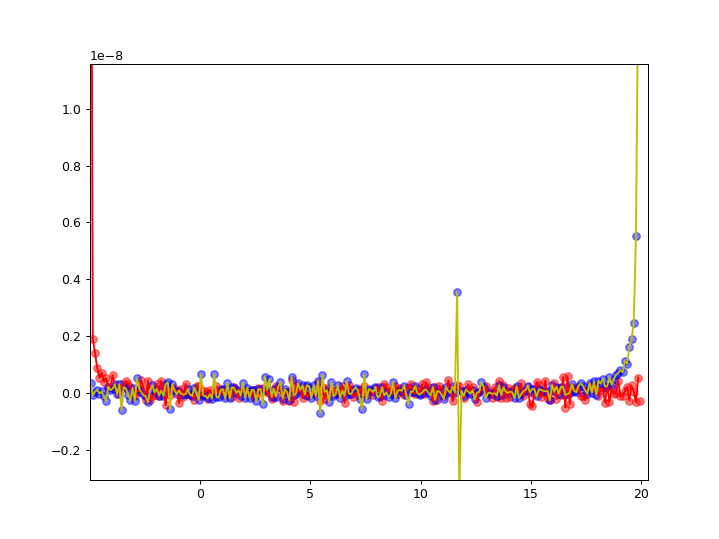

In [65]:
# You don't really need to do anything here 
# The code is more or less automatic and saves the peak transconductance value for the mobility calculation
# The only thing that you can change is the number of averaging

gm_fw  = []
Vtr_fw = []
gm_bw  = []
Vtr_bw = []

# Averaging points
dev=10

# Averaging function
def average(complist, N):
    complist = np.array(complist)
    averlist = []
    counter = 0
    num = 0
    while counter < len(complist)-N:
        for i in range(N):
            num = num + complist[counter+i]
        averlist.append(num/N)
        counter = counter + N
        num = 0
    return averlist, (max(complist)-min(complist))/len(complist)*N, max(averlist)

# Calculating transconductance values
for i in range(len(I_fw)-1):
    DeltaI = I_fw[i+1]-I_fw[i]
    DeltaV = Vg_fw[i+1]-Vg_fw[i]
    gm_fw.append(DeltaI/DeltaV)
    Vtr_fw.append(DeltaV/2+Vg_fw[i])
    
for i in range(len(I_bw)-1):
    gm_bw.append((I_bw[i+1]-I_bw[i])/(Vg_bw[i+1]-Vg_bw[i]))
    Vtr_bw.append((Vg_bw[i+1]-Vg_bw[i])/2+Vg_bw[i])


# Extracting the average lists
gm_avg_fw  = average(gm_fw,dev)
Vtr_avg_fw = average(Vtr_fw,dev)
gm_avg_bw  = average(gm_bw,dev)
Vtr_avg_bw = average(Vtr_bw,dev)

fig12, ax12 = plt.subplots(figsize=(8, 6))
ax12.plot(Vtr_fw,gm_fw,'ro', alpha = 0.5)
ax12.plot(Vtr_bw,gm_bw,'bo', alpha = 0.5)
ax12.plot(Vtr_avg_fw[0],gm_avg_fw[0],'r')
ax12.plot(Vtr_avg_bw[0],gm_avg_bw[0],'y')
plt.show()

# Find the Voltage of peak transconductance
indx_avg_peak_fw = gm_avg_fw[0].index(gm_avg_fw[2])
indx_avg_peak_bw = gm_avg_bw[0].index(gm_avg_bw[2])

Vtr_avg_peak_fw = Vtr_avg_fw[0][indx_avg_peak_fw]
Vtr_avg_peak_bw = Vtr_avg_bw[0][indx_avg_peak_bw]

log['averaging'] = Vtr_avg_fw[1]
log['gm_fw'] = gm_avg_fw[2]
log['gm_bw'] = gm_avg_bw[2]
log['vtr_fw'] = Vtr_avg_peak_fw
log['vtr_bw'] = Vtr_avg_peak_bw

## Hysteresis

In [46]:
# Also here everything is automatic, just run this cell

def Ah(V_up,G_up,V_down,G_down): # Voltage in Volts and conductance in siemens
    Go = 7.7480917310*10**(-5)
    sur_up=0
    for i in range(len(V_up)-1):
        for j in range(len(G_up)-1):
            sur_up = sur_up + (G_up[i]+G_up[i+1])*(V_up[i+1]-V_up[i])/2
    sur_down=0
    for i in range(len(V_down)-1):
        for j in range(len(G_down)-1):
            sur_down = sur_down + (G_down[i]+G_down[i+1])*(V_down[i+1]-V_down[i])/2
    return sur_up-sur_down

Hyst = Ah(Vg_fw,Gsi_fw,Vg_bw,Geh_bw) # in VS
log['hysteresis'] = Hyst

Is = abs(I_fw[satur_indx_fw]+I_bw[satur_indx_bw])/2

log['hysteresis_high'] = np.interp(5*Is/6,I_bw ,Vg_bw)-np.interp(5*Is/6,I_fw ,Vg_fw)
log['hysteresis_mid']  = np.interp(3*Is/6,I_bw ,Vg_bw)-np.interp(3*Is/6,I_fw ,Vg_fw)
log['hysteresis_low']  = np.interp(1*Is/6,I_bw ,Vg_bw)-np.interp(1*Is/6,I_fw ,Vg_fw)

## Mobility fit

<IPython.core.display.Javascript object>


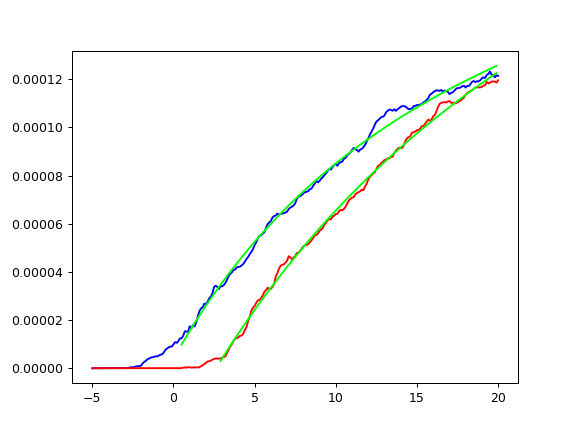

FW: k= 4013.068101753922 +- 6616.394874395511 l= 79969.5195090093 +- 2222697.473557799 m= 0.31802661135655236 +- 0.004192599450090418
BW: k= 2857.4027164461663 +- 6560.667671880238 l= 91569.43484558856 +- 1730765.8937651953 m= -2.6211565149977285 +- 0.002069954829680443
101.64307480626033
88.76704183422748


In [51]:
# Calculation of mobility by fitting a curve:
# Towards high mobility InSb nanowire devices
# Önder Gül et al 2015 Nanotechnology 26 215202

# The fitted function
def gul(x, k, l, m) : # k=Rs; l=L^2/muC; m=Vth;
     return (1/(k+l/(x+m))) 
gul_vect = np.vectorize(gul)


# Changing the fitting limits sometines makes the fitting easier
fwmin = 15
fwmax = 0
bwmin = 0
bwmax = 0

# Set the range for the fitting 
Vg_fit_fw = np.array(Vg_fw [(tail_indx_fw+fwmin):(satur_indx_fw+fwmax)])
G_fit_fw  = np.array(Gsi_fw[(tail_indx_fw+fwmin):(satur_indx_fw+fwmax)])
Vg_fit_bw = np.array(Vg_bw [(tail_indx_bw+bwmin):(satur_indx_bw+bwmax)])
G_fit_bw  = np.array(Gsi_bw[(tail_indx_bw+bwmin):(satur_indx_bw+bwmax)])

log['vtail_fw']  = Vg_fw[tail_indx_fw+fwmin]
log['vtail_bw']  = Vg_fw[tail_indx_bw+bwmin]
log['gtail_fw']  = Gsi_fw[tail_indx_fw+fwmin]
log['gtail_bw']  = Gsi_fw[tail_indx_bw+bwmin]

# Fit and plot
fig13 = plt.figure()
ax13  = fig13.add_subplot(111)

ax13.plot(Vg_fw, Gsi_fw,'b', picker=2)
ax13.plot(Vg_bw, Gsi_bw,'r', picker=2)




# Fitting the curves: the python method that we use to fit these curves is highly depended
# on the initial values that we will address called "p0"
# For example we set "p0=[3000, 50000, 5]" for the three fitting parameters that we have
# The better your prediction for the initial values the easier the fitting to the curve will be


# Fitting for the sweep-up
popt_fw, pcov_fw = opt.curve_fit(gul, Vg_fit_fw, G_fit_fw,p0=[3000, 50000, 5])
ax13.plot(Vg_fit_fw, gul(Vg_fit_fw, *popt_fw), 'lime')

# Fitting for the sweep down
popt_bw, pcov_bw = opt.curve_fit(gul, Vg_fit_bw, G_fit_bw,p0=[2700, 50000, 5])
ax13.plot(Vg_fit_bw, gul(Vg_fit_bw, *popt_bw), 'lime')

plt.show()

# Obtain the results
Lo = log['length']*1e-9

Rs_fw = popt_fw[0]
Rs_bw = popt_bw[0]
LLmuC_fw = popt_fw[1]
LLmuC_bw = popt_bw[1]
Vth_fit_fw = popt_fw[2]
Vth_fit_bw = popt_bw[2]

dRs_fw = pcov_fw[0][0]
dRs_bw = pcov_bw[0][0]
dLLmuC_fw = pcov_fw[1][1]
dLLmuC_bw = pcov_bw[1][1]
dVth_fit_fw = pcov_fw[2][2]
dVth_fit_bw = pcov_bw[2][2]

# Log the results
log['vth_fit_fw'] = -Vth_fit_fw
log['vth_fit_bw'] = -Vth_fit_bw
log['dvth_fit_fw'] = dVth_fit_fw
log['dvth_fit_bw'] = dVth_fit_bw
log['deltav_fw'] = log['vth_fit_fw']-log['vth_fw']
log['deltav_bw'] = log['vth_fit_bw']-log['vth_bw']
log['muc_fw'] = Lo**2/LLmuC_fw
log['muc_bw'] = Lo**2/LLmuC_bw
log['dmuc_fw'] = (Lo/LLmuC_fw)**2*dLLmuC_fw
log['dmuc_bw'] = (Lo/LLmuC_bw)**2*dLLmuC_bw
log['mu_fw']  = Lo**2/(LLmuC_fw*log['capacitance'])*10000
log['mu_bw']  = Lo**2/(LLmuC_bw*log['capacitance'])*10000
log['dmu_fw'] = Lo**2/(LLmuC_fw**2*log['capacitance'])*dLLmuC_fw*10000
log['dmu_bw'] = Lo**2/(LLmuC_bw**2*log['capacitance'])*dLLmuC_bw*10000
log['rs_fw'] = Rs_fw
log['rs_bw'] = Rs_bw
log['drs_fw'] = dRs_fw
log['drs_bw'] = dRs_bw


print ('FW: k=', Rs_fw, '+-', dRs_fw, 'l=', LLmuC_fw, '+-', dLLmuC_fw, 'm=', Vth_fit_fw, '+-', dVth_fit_fw)
print ('BW: k=', Rs_bw, '+-', dRs_bw, 'l=', LLmuC_bw, '+-', dLLmuC_bw, 'm=', Vth_fit_bw, '+-', dVth_fit_bw)
print (log['mu_fw'])
print (log['mu_bw'])

# If you are satisfied with your fit results, append data to the txt file
# Otherwise re-excecute this cell
# After some tries that you are confident the results look good append data to the txt log file

## Plateaus investigation

<IPython.core.display.Javascript object>


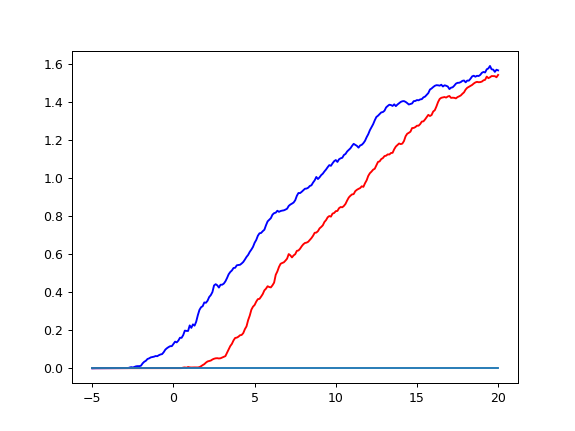

In [52]:
# If you see plateaus you can use this script to obtain the start and end of each plateau (meaning their size)

%matplotlib notebook

plateaulist=[]

def onpick(event):
    thisline = event.artist
    xdata = thisline.get_xdata()
    ydata = thisline.get_ydata()
    ind = event.ind
    points = tuple(zip(xdata[ind], ydata[ind],ind))
    plateaulist.append(points)

fig11 = plt.figure()
ax11  = fig11.add_subplot(111)

ax11.plot(Vg_fw, Geh_fw,'b',picker=2)
ax11.plot(Vg_bw, Geh_bw,'r',picker=2)
ax11.plot(np.linspace(min(Vg_fw),max(Vg_fw),len(Vg_fw)),np.zeros(len(Vg_fw)))
fig11.canvas.mpl_connect('pick_event', onpick)
plt.show()

In [388]:
plateaulist

[((-9.91568, 0.44502386309130187, 120),),
 ((-9.91568, 0.44502386309130187, 120),),
 ((-9.91568, 0.44502386309130187, 120),),
 ((-9.91568, 0.44502386309130187, 120),),
 ((-9.91568, 0.44502386309130187, 120),),
 ((-6.4443799999999998, 0.90235929196766052, 222),),
 ((-6.4443799999999998, 0.90235929196766052, 222),),
 ((-6.4443799999999998, 0.90235929196766052, 222),),
 ((-6.4443799999999998, 0.90235929196766052, 222),),
 ((20.0, 5.7328546602103581, 999),),
 ((20.0, 5.7328546602103581, 999),),
 ((20.0, 5.7328546602103581, 999),)]

## The final dictionary 
Here you will find all the paraeters that you added from this code

In [1]:
log

NameError: name 'log' is not defined

In [33]:
# Print the values as columns to copy-paste them in an excel file

for key in log:
    print(key)

print('============================')
    
for key in log:
    print(log[key])

id
length
width
capacitance
location
fridge
lockin
sourcemeter
multimeter
currentampl
voltageampl
voltdivac
voltdivdc
gain
timeconstant
sensitivity
frequency
amplitude
filter_slope
loadingdate
operator
degastime
degastempereture
temperature
field
biasvoltage
gatemax
gatemin
points
steps
duration
sweeprate
sweep
vth_fw
vth_bw
is_fw
is_bw
vs_fw
vs_bw
vtail_fw
vtail_bw
gtail_fw
gtail_bw
vonoff_fw
vonoff_bw
averaging
gm_fw
gm_bw
vtr_fw
vtr_bw
hysteresis
hysteresis_high
hysteresis_mid
hysteresis_low
vth_fit_fw
vth_fit_bw
dvth_fit_fw
dvth_fit_bw
deltav_fw
deltav_bw
muc_fw
muc_bw
dmuc_fw
dmuc_bw
mu_fw
mu_bw
dmu_fw
dmu_bw
rs_fw
rs_bw
drs_fw
drs_bw
qdev
100
100
1.230262309145502e-17
mqml
dynacoolppms

keithley2614bsmub



1.0
1.0
1
0.0
0.0
0
0
0
20190212
ajuan
12
300
1.7
9
0.005
19
-19
201
0.1890547263681592
40
0.95
fwbw
-3.59976
0.599999
6.23752e-07
5.88573e-07
19.3995
18.7995
0.399979
3.39968
1.2621343734794642e-05
4.406337036926118e-05
22.99926
18.199500999999998
0.198995
1.1445585544144557e